In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [7]:
df=pd.read_csv('/home/behnaz/Documents/Data-Science-and-Machine-Learning/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/Classified Data',index_col=0)

In [8]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [14]:
scaler_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [15]:
scaler_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [18]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [23]:
df.columns[-1:2]

Index([], dtype='object')

In [21]:
df.columns[::-1]

Index(['TARGET CLASS', 'NXJ', 'HQE', 'PJF', 'FDJ', 'QWG', 'LQE', 'SBI', 'EQW',
       'PTI', 'WTT'],
      dtype='object')

In [25]:
df_transform=pd.DataFrame(scaler_feature,columns=df.columns[:-1])

In [26]:
df_transform

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [27]:
X=df_transform
y=df['TARGET CLASS']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
prediction=knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
print(confusion_matrix(y_test,prediction))

[[151   8]
 [ 15 126]]


In [45]:
error_rate=[]
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_rate.append(np.mean(predict_i !=y_test))
print('Finish')    

Finish


In [46]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05,
 0.04]

In [57]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'KNN vs Error_rate')

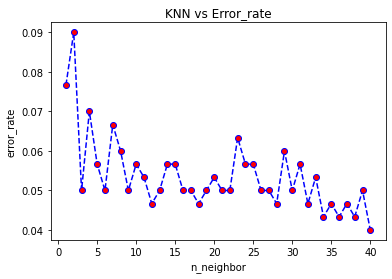

In [58]:
plt.plot(range(1,41),error_rate,color='blue',marker='o',linestyle='--',markerfacecolor='red')
plt.xlabel('n_neighbor')
plt.ylabel('error_rate')
plt.title('KNN vs Error_rate')

In [59]:
knn=KNeighborsClassifier(n_neighbors=17)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [61]:
predict=knn.predict(X_test)

In [63]:
confusion_matrix(y_test,predict)

array([[153,   6],
       [  9, 132]])

In [64]:
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95       159\n           1       0.96      0.94      0.95       141\n\n    accuracy                           0.95       300\n   macro avg       0.95      0.95      0.95       300\nweighted avg       0.95      0.95      0.95       300\n'